<a href="https://colab.research.google.com/github/DataScienceAndEngineering/machine-learning-dse-i210-final-project-signlanguageclassification/blob/sumaiya/machine-learning-dse-i210-final-project-signlanguageclassification/notebooks/1_5_su_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#import library
import os
import numpy as np
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, matthews_corrcoef, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# 100k shuffled data
with open('/content/drive/Shareddrives/SignLanguageData/combined_augmented_data_v3.pkl','rb') as f:
  X_train,y_train,X_test,y_test = pickle.load(f)


In [18]:
#printing shapes 
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (109820, 28, 28)
y_train Shape: (109820,)
X_test Shape: (28688, 28, 28)
y_test Shape: (28688,)


In [19]:
#define image resolution 
res = (28,28)

In [20]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')

In [21]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(list(np.unique(y_train.astype(int))))
#dictionary of labels 
labels = dict(zip(numbers,letters))

In [14]:
# # Reshape the data to (num_samples, 784)
# X_train = X_train.reshape(X_train.shape[0], -1)
# X_test = X_test.reshape(X_test.shape[0], -1)
# y_train = y_train
# y_test = y_test
# # Print the shapes of the augmented data
# print(f'X_train shape: {X_train.shape}')
# print(f'y_train shape: {y_train.shape}')
# print(f'X_test shape: {X_test.shape}')
# print(f'y_test shape: {y_test.shape}')

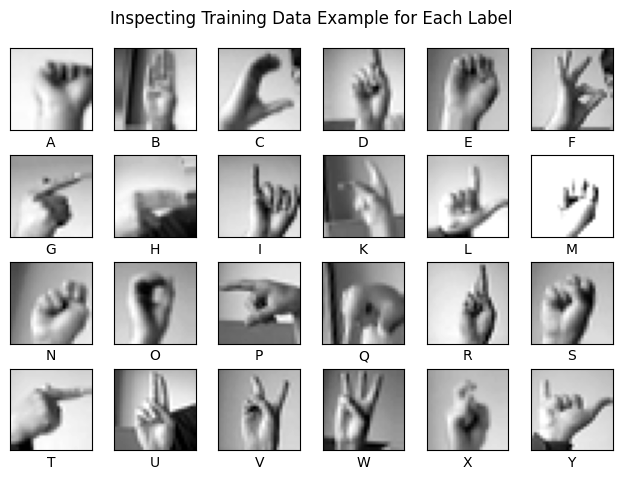

In [23]:
#visualization of dataset 
fig, ax = plt.subplots(4,6)
fig.suptitle('Inspecting Training Data Example for Each Label')
ax = ax.ravel()
pos = 0 

#loop through each label in dataset 
for label in range(0,26):
    #if label is not included in dataset 
    if label in [9,25]:
        continue
    #find first index of label
    idx = find_indices(y_train,label)[0][0]
    #display first found image 
    ax[pos].imshow(X_train[idx],cmap='gray')
    #set x label as dataset label
    ax[pos].set(xlabel=labels[label])
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

In [52]:
def canny_edges(img, sigma=0.5):
    # Convert image to uint8 if needed
    if img.dtype != 'uint8':
        img = np.uint8(img)
    
    # Calculate lower and upper thresholds for Canny edge detection
    med = np.median(img)
    lower = int(max(0, (1 - sigma) * med))
    upper = int(min(255, (1 + sigma) * med))
    
    # Apply Canny edge detection
    edges = cv2.Canny(img, lower, upper)
    
    # Dilate the edges to connect broken lines and close gaps
    kernel = np.ones((3,3), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=1)
    
    # Return the edges
    return edges


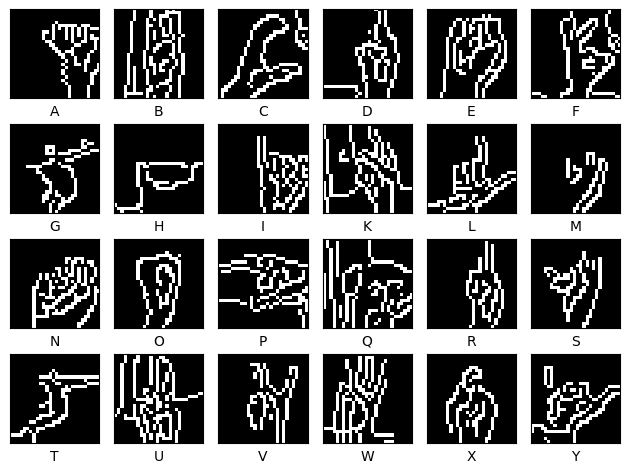

In [53]:
#visualization of dataset 
fix, ax = plt.subplots(4,6)
ax = ax.ravel()
pos = 0 

#loop through each label in dataset 
for label in range(0,26):
    #if label is not included in dataset 
    if label in [9,25]:
        continue
    #find first index of label
    idx = find_indices(y_train,label)[0][0]
    #display first found image 
    ax[pos].imshow(canny_edges(X_train[idx,:]),cmap='gray')
    #set x label as dataset label
    ax[pos].set(xlabel=labels[label])
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1
plt.tight_layout()
plt.show()

In [54]:
# Apply edge enhancement to the training data
X_train_edges = np.zeros(X_train.shape)
for i in range(X_train.shape[0]):
    X_train_edges[i] = canny_edges(X_train[i])

# Apply edge enhancement to the test data
X_test_edges = np.zeros(X_test.shape)
for i in range(X_test.shape[0]):
    X_test_edges[i] = canny_edges(X_test[i])


In [ ]:
#printing shapes 
print(f'X_train_edges Shape: {X_train_edges.shape}')
print(f'X_test_edges Shape: {X_test_edges.shape}')

X_train_edges Shape: (109820, 28, 28)
X_test_edges Shape: (28688, 28, 28)
